In [2]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [4]:
train_df_oe = pd.read_csv(DATASET_DIR + "/train_df_oe.csv", keep_default_na=False)
y = train_df_oe.iloc[:,-1]
X = train_df_oe.iloc[:,:-1]

In [5]:
train_df_oe

,Authors,PublishYear,PublishMonth,PublishDay,Publisher,pagesNumber,reading_writing,gay_lesbian,secret_life,travel_guide,...,north america,paperback edition,book cover,book one,family life,civil right,step instruction,young girl,everything need,rating_label
0,8046.0,13.0,3.0,0.0,3917.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,6185.0,12.0,5.0,0.0,1180.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,3220.0,13.0,1.0,6.0,850.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,2368.0,13.0,4.0,0.0,493.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,15253.0,13.0,3.0,1.0,3031.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,6887.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
23059,3613.0,13.0,3.0,0.0,1941.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
23060,2054.0,12.0,1.0,3.0,3468.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
23061,7029.0,13.0,2.0,4.0,2741.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# Stacking Naive Bayes

In [6]:
GAUSSIAN_FEATURES = ['PublishYear', 'PublishMonth', 'PublishDay', 'pagesNumber']
CATEGORICAL_FEATURES = ['Authors', 'Publisher']
MULTINOMIAL_FEATURES = list(X.columns)[6:]

GAUSSIAN_FEATURES_ID = [1, 2, 3, 5]
CATEGORICAL_FEATURES_ID = [0, 4]
MULTINOMIAL_FEATURES_ID = range(6, X.shape[1])

In [7]:
N_CAT_VALUES = [19244, 4519]  # number of unique authors, publishers

In [8]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

In [9]:
# Split the training set for each Naive Bayes base classifier
X_gaussian = X[GAUSSIAN_FEATURES]
X_categorical = X[CATEGORICAL_FEATURES]
X_multinomial = X[MULTINOMIAL_FEATURES]

## Gaussian NB for PublishYear and pagesNumber

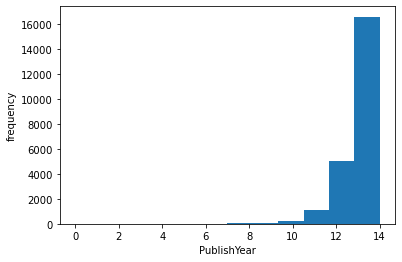

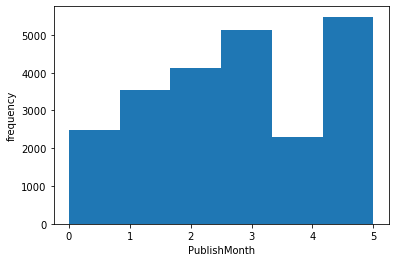

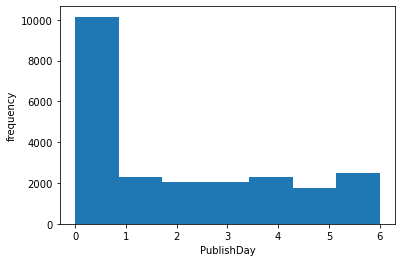

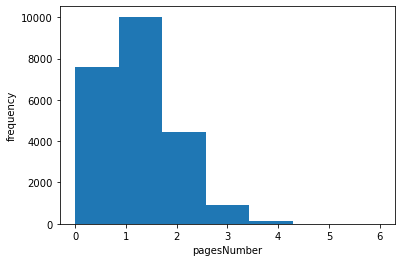

In [10]:
# check distribution of PublishYear and pagesNumber
for feature in GAUSSIAN_FEATURES:
    hist_plot(X, feature, bins=X[feature].nunique())

GaussianNB prediction took 0.2100238800048828 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0                0.0           0.825000           0.056075       0.702211
1                0.0           0.825843           0.126126       0.703945
2                0.0           0.823920           0.086957       0.700910
3                0.0           0.825754           0.125000       0.703816
4                0.0           0.824131           0.087719       0.701214
5                0.0           0.824942           0.106195       0.702515
6                0.0           0.823830           0.104348       0.701214
7                0.0           0.824732           0.089286       0.702082
8                0.0           0.825121           0.074074       0.702515
9                0.0           0.824942           0.125000       0.702949


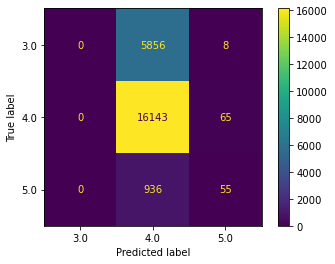

test_3.0_f1-score    0.000000
test_4.0_f1-score    0.824822
test_5.0_f1-score    0.098078
test_accuracy        0.702337
dtype: float64

In [11]:
gnb = GaussianNB()
gnb_pred, gnb_report = cross_val_report(gnb, X_gaussian, y)
gnb_report

## Categorical NB for Authors and Publisher

In [10]:
# Tuning for alpha smoothing
cnb = CategoricalNB(min_categories = N_CAT_VALUES)
param_grid = {'alpha': [i/10 for i in range(1, 15)]}
tune_hyperparameter(cnb, param_grid, X_categorical, y)

# larger alpha -> overestimate the likelihood
# could be because there is more samples with label4 ratings, and the missing values are randomly 
# distributed across the dataset, hence more samples with label4 rating with missing values
# -> likelihood of P(x|c=4) overestimated -> more samples predicted to have label=4

Fitting 20 folds for each of 14 candidates, totalling 280 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .....................................

[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ...................

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'alpha': 0.1},0.452329,0.021165,7,0.469817,0.028781,1,0.460606,0.021915,1,...,14,0.450898,0.044399,1,0.262193,0.031999,4,0.632875,0.010143,14
1,{'alpha': 0.2},0.473283,0.024629,6,0.407744,0.028450,3,0.437709,0.023871,2,...,13,0.388306,0.048403,2,0.258726,0.035059,5,0.656506,0.009177,13
2,{'alpha': 0.3},0.428745,0.018688,12,0.418143,0.024585,2,0.423247,0.020596,3,...,12,0.222755,0.052466,3,0.308640,0.060431,1,0.677406,0.009028,12
3,{'alpha': 0.4},0.433278,0.020911,11,0.393243,0.021996,4,0.412169,0.020424,4,...,11,0.214694,0.055515,4,0.301732,0.065658,2,0.681568,0.010143,11
4,{'alpha': 0.5},0.434082,0.023026,10,0.369538,0.019023,5,0.399118,0.019815,5,...,10,0.177388,0.048943,5,0.265900,0.060795,3,0.683866,0.010585,10
5,{'alpha': 0.6},0.438044,0.022533,8,0.353509,0.020037,6,0.391097,0.019650,6,...,8,0.157265,0.043515,6,0.243350,0.055683,6,0.686771,0.010165,7
6,{'alpha': 0.7},0.437336,0.023711,9,0.337647,0.023262,7,0.380919,0.022571,7,...,9,0.130082,0.044608,7,0.208791,0.062982,7,0.687378,0.009922,6
7,{'alpha': 0.8},0.426739,0.022831,13,0.322811,0.023710,8,0.367414,0.022845,8,...,5,0.100857,0.039106,8,0.174593,0.061716,8,0.685861,0.009440,8
8,{'alpha': 0.9},0.424329,0.024245,14,0.313604,0.024955,9,0.360501,0.024363,9,...,4,0.089735,0.037787,9,0.158243,0.062543,9,0.685513,0.009489,9
9,{'alpha': 1.0},0.570783,0.040940,2,0.215031,0.028377,10,0.311859,0.034679,10,...,3,0.078653,0.040052,10,0.139846,0.066746,10,0.720374,0.008002,1


CategoricalNB prediction took 0.31748199462890625 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.333333           0.827904           0.122807       0.723017
1           0.310345           0.825981           0.149533       0.719549
2           0.303861           0.824386           0.057692       0.716515
3           0.324723           0.829361           0.130841       0.724198
4           0.342926           0.825838           0.146789       0.722463
5           0.314634           0.825414           0.128440       0.718127
6           0.290446           0.826660           0.132075       0.719428
7           0.306533           0.827791           0.222222       0.722463
8           0.291771           0.822450           0.076923       0.713356
9           0.271447           0.823656           0.144144       0.713790


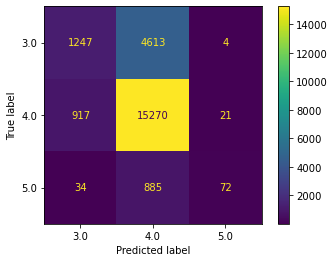

test_3.0_f1-score    0.309002
test_4.0_f1-score    0.825944
test_5.0_f1-score    0.131147
test_accuracy        0.719291
dtype: float64

In [12]:
cnb = CategoricalNB(alpha=1, min_categories = N_CAT_VALUES)
cnb_pred, cnb_report = cross_val_report(cnb, X_categorical, y)
cnb_report

## Multinomial NB for Name and Description

In [12]:
# Tuning for alpha smoothing
mnb = MultinomialNB()
param_grid = {'alpha': [i/10 for i in range(1, 15)]}
tune_hyperparameter(mnb, param_grid, X_multinomial, y)

Fitting 20 folds for each of 14 candidates, totalling 280 fits
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .....................................

[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ...................

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'alpha': 0.1},0.537137,0.101368,3,0.042627,0.009276,1,0.078872,0.016824,1,...,1,0.053490,0.036806,1,0.092243,0.059785,1,0.704332,0.004888,1
1,{'alpha': 0.2},0.540602,0.104540,1,0.042457,0.009526,2,0.078617,0.017296,2,...,4,0.053490,0.036806,1,0.091530,0.059343,5,0.704115,0.004994,2
2,{'alpha': 0.3},0.538083,0.102571,2,0.040923,0.009438,3,0.075964,0.017154,3,...,5,0.053490,0.036806,1,0.091601,0.059591,3,0.704029,0.004558,3
3,{'alpha': 0.4},0.532569,0.099449,10,0.039900,0.009570,4,0.074125,0.017385,4,...,6,0.053490,0.036806,1,0.091463,0.059206,6,0.703812,0.004367,6
4,{'alpha': 0.5},0.530763,0.098660,12,0.039559,0.009341,5,0.073520,0.016980,6,...,3,0.053490,0.036806,1,0.091586,0.059162,4,0.703812,0.004236,5
5,{'alpha': 0.6},0.532961,0.100021,9,0.039559,0.009341,5,0.073528,0.016970,5,...,2,0.053490,0.036806,1,0.091758,0.059315,2,0.703942,0.004203,4
6,{'alpha': 0.7},0.529470,0.101834,14,0.039047,0.009470,7,0.072612,0.017222,7,...,7,0.050449,0.036366,7,0.086666,0.058604,7,0.703682,0.004236,12
7,{'alpha': 0.8},0.534877,0.098404,7,0.038707,0.008959,8,0.072079,0.016328,8,...,9,0.049449,0.037449,8,0.084912,0.060612,9,0.703812,0.004087,7
8,{'alpha': 0.9},0.535635,0.104550,4,0.038026,0.008961,9,0.070890,0.016357,9,...,8,0.049449,0.037449,8,0.085063,0.060834,8,0.703812,0.004190,8
9,{'alpha': 1.0},0.531556,0.106224,11,0.037343,0.008775,10,0.069672,0.016049,10,...,10,0.046408,0.036134,10,0.080158,0.058723,10,0.703551,0.004209,13


MultinomialNB prediction took 1.031275987625122 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.080495           0.820021           0.017857       0.697009
1           0.070513           0.824865           0.070796       0.704378
2           0.076312           0.824136           0.037383       0.703945
3           0.057785           0.823408           0.090909       0.702515
4           0.103937           0.829319           0.137931       0.712056
5           0.079114           0.825783           0.188034       0.707285
6           0.100787           0.827461           0.136752       0.709887
7           0.083851           0.823011           0.055046       0.701648
8           0.063191           0.822860           0.125000       0.701648
9           0.071763           0.821456           0.053571       0.698612


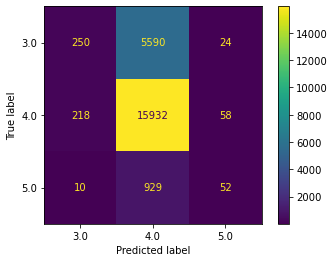

test_3.0_f1-score    0.078775
test_4.0_f1-score    0.824232
test_5.0_f1-score    0.091328
test_accuracy        0.703898
dtype: float64

In [13]:
# better than complementNB and gaussianNB
mnb = MultinomialNB(alpha=0.1)
mnb_pred, mnb_report = cross_val_report(mnb, X_multinomial, y)
mnb_report

## Categorical NB for final prediction

CategoricalNB prediction took 0.19905781745910645 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.333333           0.827904           0.122807       0.723017
1           0.310345           0.826205           0.166667       0.719983
2           0.304239           0.824926           0.076190       0.717382
3           0.322660           0.829810           0.181818       0.725065
4           0.342926           0.826514           0.196429       0.723764
5           0.315018           0.827080           0.226087       0.721162
6           0.290446           0.827104           0.166667       0.720295
7           0.306533           0.828015           0.237288       0.722897
8           0.292135           0.823656           0.148148       0.715525
9           0.294046           0.818825           0.176991       0.709454


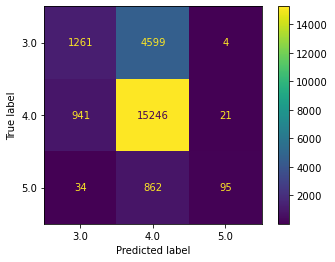

test_3.0_f1-score    0.311168
test_4.0_f1-score    0.826004
test_5.0_f1-score    0.169909
test_accuracy        0.719854
dtype: float64

In [14]:
X_preds = pd.DataFrame({'GaussianNB_preds' : gnb_pred,
                        'CategoricalNB_preds' : cnb_pred,
                        'MultinomialNB_preds' : mnb_pred})

# meta-classifier
stack_nb = CategoricalNB()
stack_nb.fit(X_preds, y)  # input = base models' predictions
cross_val_report(stack_nb, X_preds, y)[1]

## Altogether: Generate Model

In [15]:
from sklearn.base import ClassifierMixin, BaseEstimator

In [16]:
class StackingNB(ClassifierMixin, BaseEstimator):

    def __init__(self, classifiers, metaclassifier, feature_sets):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier
        self.feature_sets = feature_sets

    def fit(self, X, y):
        base_preds = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            clf.fit(X[feature_set], y)  # base classifier uses a subset of features
        
        X_meta = self._predict_base(X) # output of the base classifiers
        self.metaclassifier.fit(X_meta, y) # # output of the base classifiers = input for meta-classifier
        return self
    
    def _predict_base(self, X):
        y_hats = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            y_hat = clf.predict(X[feature_set])
            y_hats.append(y_hat)
        
        y_hats = pd.DataFrame({get_model_name(self.classifiers[i])+'_pred' : y_hats[i] 
                                for i in range(len(self.classifiers))})
        assert y_hats.shape[0] == X.shape[0] # check that the number of rows yhats matches the number of rows in the input data X
        return y_hats
    
    def predict(self, X): 
        X_meta = self._predict_base(X)
        y_hat = self.metaclassifier.predict(X_meta)
        return y_hat
    
    # for completeness
    def predict_proba(self, X): 
        X_meta = self._predict_base(X)
        return self.metaclassifier.predict_proba(X_meta)
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return accuracy_score(y, y_hat)

## Attempt 1: Using all features

StackingNB prediction took 2.942126989364624 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.333333           0.827904           0.122807       0.723017
1           0.310345           0.826205           0.166667       0.719983
2           0.303861           0.824609           0.076190       0.716948
3           0.324723           0.830035           0.181818       0.725499
4           0.342926           0.826514           0.196429       0.723764
5           0.314634           0.826761           0.226087       0.720729
6           0.290446           0.827104           0.166667       0.720295
7           0.306533           0.828015           0.237288       0.722897
8           0.291771           0.823339           0.148148       0.715091
9           0.271447           0.824099           0.176991       0.714657


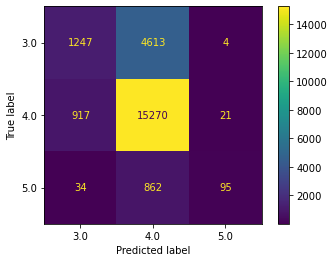

test_3.0_f1-score    0.309002
test_4.0_f1-score    0.826458
test_5.0_f1-score    0.169909
test_accuracy        0.720288
dtype: float64

In [17]:
initial_feature_sets = [GAUSSIAN_FEATURES, CATEGORICAL_FEATURES, MULTINOMIAL_FEATURES]

base_classifiers = [GaussianNB(),
                    CategoricalNB(alpha=1, min_categories=N_CAT_VALUES),
                    MultinomialNB(alpha=0.1)]

meta_classifier = CategoricalNB()
snb = StackingNB(base_classifiers, meta_classifier, initial_feature_sets)
snb.fit(X, y)

y_pred, snb_report = cross_val_report(snb, X, y)
snb_report

## Attempt 2: Using selected features

In [18]:
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X[MULTINOMIAL_FEATURES], y)
pvals = pd.DataFrame(chi2_selector.pvalues_, index=chi2_selector.feature_names_in_, columns=['p-value'])
filtered_mn_features = pvals[pvals['p-value'] < ALPHA].index.tolist()
print(len(filtered_mn_features), "multinomial features are significant.")
filtered_mn_features

82 multinomial features are significant.


['reading_writing',
 'gay_lesbian',
 'american_indian',
 'american_woman',
 'complete_guide',
 'louis_amour',
 'field_guide',
 'selected_poem',
 'spiritual_life',
 'volume_one',
 'idiot_guide',
 'discourse_analysis',
 'middle_east',
 'science_fiction',
 'weight_loss',
 'short_story',
 'rough_guide',
 'everything_need',
 'strategy_guide',
 'life_lesson',
 'life_work',
 'part_harvard',
 'short_history',
 'study_bible',
 'great_war',
 'picture_book',
 'little_book',
 'end_time',
 'best_kept',
 'lord_ring',
 'multiple_personality',
 'revised_updated',
 'ancient_world',
 'self_esteem',
 'ultimate_guide',
 'gay_men',
 'intercultural_communication',
 'selected_letter',
 'doctor_short',
 'able_team',
 'book_one',
 'life_love',
 'transactional_analysis',
 'vegetarian_recipe',
 'edge_chronicle',
 'red_riding',
 'life time',
 'best known',
 'book written',
 'point view',
 'new york',
 'two year',
 'need know',
 'first book',
 'world war',
 'critically acclaimed',
 'originally published',
 'even t

In [19]:
f_selector = SelectKBest(k=2)
X_filtered_f = f_selector.fit_transform(X[GAUSSIAN_FEATURES + CATEGORICAL_FEATURES], y)
fvals = pd.DataFrame(f_selector.pvalues_, index=f_selector.feature_names_in_, columns=['F-value'])
fvals.sort_values('F-value')

,F-value
pagesNumber,1.939041e-44
PublishYear,4.982373e-33
PublishDay,3.779786e-03
Authors,3.607589e-01
Publisher,8.375307e-01
PublishMonth,8.957847e-01


In [20]:
filtered_gaus_features = ['pagesNumber', 'PublishYear']
filtered_cat_features = ['Authors']
filtered_feature_sets = [filtered_gaus_features, filtered_cat_features, filtered_mn_features]
X_filtered = X[filtered_gaus_features + filtered_cat_features + filtered_mn_features]
X_filtered

,pagesNumber,PublishYear,Authors,reading_writing,gay_lesbian,american_indian,american_woman,complete_guide,louis_amour,field_guide,...,original due,may contain,contain imperfection,imperfection mark,true original,book explores,half century,eight year,want know,everything need
0,0.0,13.0,8046.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,12.0,6185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,13.0,3220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,13.0,2368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,13.0,15253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,0.0,12.0,6887.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23059,0.0,13.0,3613.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23060,0.0,12.0,2054.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23061,0.0,13.0,7029.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


StackingNB prediction took 1.2306487560272217 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.304348           0.829545           0.294118       0.724751
1           0.263852           0.826145           0.260163       0.718682
2           0.302326           0.829965           0.263566       0.725618
3           0.279627           0.832620           0.264463       0.727667
4           0.303595           0.834717           0.250000       0.732003
5           0.277704           0.832664           0.312500       0.728101
6           0.275132           0.830118           0.290323       0.724631
7           0.261104           0.830835           0.300752       0.723764
8           0.296199           0.831587           0.253968       0.727233
9           0.258856           0.830933           0.265625       0.724198


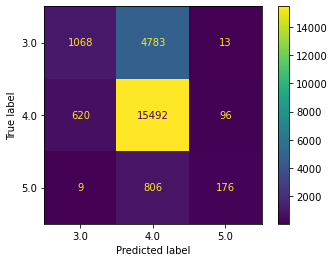

test_3.0_f1-score    0.282274
test_4.0_f1-score    0.830913
test_5.0_f1-score    0.275548
test_accuracy        0.725665
dtype: float64

In [21]:
base_classifiers = [GaussianNB(),
                    CategoricalNB(alpha=0.1, min_categories=N_CAT_VALUES[0]),
                    MultinomialNB(alpha=0.1)]

snb = StackingNB(base_classifiers, meta_classifier, filtered_feature_sets)
snb.fit(X_filtered, y)

y_pred, snb_report = cross_val_report(snb, X_filtered, y)
snb_report

## Stacking CV Classifier

In [22]:
# https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/#example-4-stacking-of-classifiers-that-operate-on-different-feature-subsets
from mlxtend.classifier import StackingCVClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [24]:
gnb = make_pipeline(ColumnSelector(filtered_gaus_features),
                      GaussianNB())
cnb = make_pipeline(ColumnSelector(filtered_cat_features),
                      CategoricalNB(alpha=0.1, min_categories=N_CAT_VALUES[0]))
mnb = make_pipeline(ColumnSelector(filtered_mn_features),
                      MultinomialNB(alpha=0.1))

cvsnb = StackingCVClassifier(classifiers=[gnb, cnb, mnb], 
                            meta_classifier=LogisticRegression(),
                            random_state=30027)

cvsnb.fit(X, y)

StackingCVClassifier(classifiers=[Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['pagesNumber',
                                                                        'PublishYear'])),
                                                  ('gaussiannb',
                                                   GaussianNB())]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['Authors'])),
                                                  ('categoricalnb',
                                                   CategoricalNB(alpha=0.1,
                                                                 min_categories=19244))]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['reading_wr...
                                                                        'science_fiction',
                                                                        'weight_loss',
                                                                        'short_story',
                                                                        'rough_guide',
                                                                        'everything_need',
                                                                        'strategy_guide',
                                                                        'life_lesson',
                                                                        'life_work',
                                                                        'part_harvard',
                                                                        'short_history',
                                                                        'study_bible',
                                                                        'great_war',
                                                                        'picture_book',
                                                                        'little_book',
                                                                        'end_time',
                                                                        'best_kept',
                                                                        'lord_ring', ...])),
                                                  ('multinomialnb',
                                                   MultinomialNB(alpha=0.1))])],
                     meta_classifier=LogisticRegression(), random_state=30027)

StackingCVClassifier prediction took 7.66877007484436 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.327500           0.830117           0.296296       0.727352
1           0.288660           0.826774           0.077670       0.719549
2           0.330391           0.831302           0.250000       0.729085
3           0.305699           0.833423           0.254237       0.730269
4           0.332036           0.836696           0.225806       0.735906
5           0.304688           0.833244           0.285714       0.730269
6           0.315789           0.831987           0.218487       0.728968
7           0.294271           0.829503           0.039216       0.722897
8           0.326115           0.832613           0.227642       0.730269
9           0.281541           0.829987           0.241935       0.724631


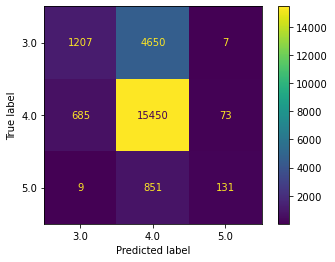

test_3.0_f1-score    0.310669
test_4.0_f1-score    0.831565
test_5.0_f1-score    0.211701
test_accuracy        0.727920
dtype: float64

In [25]:
y_pred, cvsnb_report = cross_val_report(cvsnb, X, y)
cvsnb_report

## Hyperparameter tuning

In [26]:
cvsnb.get_params()

{'classifiers': [Pipeline(steps=[('columnselector',
                   ColumnSelector(cols=['pagesNumber', 'PublishYear'])),
                  ('gaussiannb', GaussianNB())]),
  Pipeline(steps=[('columnselector', ColumnSelector(cols=['Authors'])),
                  ('categoricalnb',
                   CategoricalNB(alpha=0.1, min_categories=19244))]),
  Pipeline(steps=[('columnselector',
                   ColumnSelector(cols=['reading_writing', 'gay_lesbian',
                                        'american_indian', 'american_woman',
                                        'complete_guide', 'louis_amour',
                                        'field_guide', 'selected_poem',
                                        'spiritual_life', 'volume_one',
                                        'idiot_guide', 'discourse_analysis',
                                        'middle_east', 'science_fiction',
                                        'weight_loss', 'short_story',
                     

In [52]:
param_grid = {'pipeline-2__categoricalnb__alpha': [i/100 for i in range(1,42,5)], 
              'pipeline-3__multinomialnb__alpha': [i/100 for i in range(1,42,5)]}

grid = tune_hyperparameter(sclf, param_grid, X, y, cv=2)

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.6s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.06; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.06; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.11; total time=   0.6s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.11; total time=   0.7s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.16; total time=   0.8s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.16; total time=   0.8s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.21; tot

[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.11; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.16; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.16; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.21; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.21; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.26; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.26; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.31; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.31; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.21

[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.26; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.31; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.31; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.36; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.36; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.41; total time=   0.5s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.41; total time=   0.5s


In [59]:
grid.loc[grid['mean_test_accuracy'] > 0.72]

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
5,"{'pipeline-2__categoricalnb__alpha': 0.01, 'pi...",0.620049,0.000875,38,0.157231,0.001364,2,0.250847,0.001665,6,...,21,0.046416,0.001971,11,0.088448,0.003506,11,0.720461,0.000031,4
6,"{'pipeline-2__categoricalnb__alpha': 0.01, 'pi...",0.620049,0.000875,38,0.157231,0.001364,2,0.250847,0.001665,6,...,21,0.046416,0.001971,11,0.088448,0.003506,11,0.720461,0.000031,4
7,"{'pipeline-2__categoricalnb__alpha': 0.01, 'pi...",0.619791,0.000617,43,0.157060,0.001535,14,0.250608,0.001903,12,...,19,0.046414,0.003989,13,0.088420,0.007182,13,0.720418,0.000099,6
8,"{'pipeline-2__categoricalnb__alpha': 0.01, 'pi...",0.618973,0.001951,59,0.157060,0.001194,12,0.250541,0.001359,16,...,23,0.044398,0.001973,15,0.084765,0.003527,15,0.720288,0.000118,7
17,"{'pipeline-2__categoricalnb__alpha': 0.06, 'pi...",0.618973,0.001951,59,0.157060,0.001194,12,0.250541,0.001359,16,...,12,0.040369,0.006095,17,0.077390,0.011242,17,0.720158,0.000421,8
23,"{'pipeline-2__categoricalnb__alpha': 0.11, 'pi...",0.620049,0.000875,38,0.157231,0.001364,2,0.250847,0.001665,6,...,33,0.081802,0.065673,4,0.136105,0.104422,4,0.720548,0.001419,1
24,"{'pipeline-2__categoricalnb__alpha': 0.11, 'pi...",0.620049,0.000875,38,0.157231,0.001364,2,0.250847,0.001665,6,...,33,0.081802,0.065673,4,0.136105,0.104422,4,0.720548,0.001419,1
25,"{'pipeline-2__categoricalnb__alpha': 0.11, 'pi...",0.618949,0.000225,61,0.157060,0.001535,14,0.250540,0.001971,18,...,33,0.081802,0.065673,4,0.136105,0.104422,4,0.720505,0.001375,3


In [53]:
print(max(grid['mean_test_accuracy']))
grid.loc[grid['mean_test_accuracy'] == max(grid['mean_test_accuracy'])]['params'].values

0.7205481255147377


array([{'pipeline-2__categoricalnb__alpha': 0.11, 'pipeline-3__multinomialnb__alpha': 0.26},
       {'pipeline-2__categoricalnb__alpha': 0.11, 'pipeline-3__multinomialnb__alpha': 0.31}],
      dtype=object)

In [54]:
gnb = make_pipeline(ColumnSelector(filtered_gaus_features),
                      GaussianNB())
cnb = make_pipeline(ColumnSelector(filtered_cat_features),
                      CategoricalNB(alpha=0.11, min_categories=N_CAT_VALUES[0]))
mnb = make_pipeline(ColumnSelector(filtered_mn_features),
                      MultinomialNB(alpha=0.31))

cvsnb = StackingCVClassifier(classifiers=[gnb, cnb, mnb], 
                            meta_classifier=LogisticRegression(),
                            random_state=30027)

cvsnb.fit(X, y)

StackingCVClassifier(classifiers=[Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['pagesNumber',
                                                                        'PublishYear'])),
                                                  ('gaussiannb',
                                                   GaussianNB())]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['Authors'])),
                                                  ('categoricalnb',
                                                   CategoricalNB(alpha=0.11,
                                                                 min_categories=19244))]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['reading_w...
                                                                        'science_fiction',
                                                                        'weight_loss',
                                                                        'short_story',
                                                                        'rough_guide',
                                                                        'everything_need',
                                                                        'strategy_guide',
                                                                        'life_lesson',
                                                                        'life_work',
                                                                        'part_harvard',
                                                                        'short_history',
                                                                        'study_bible',
                                                                        'great_war',
                                                                        'picture_book',
                                                                        'little_book',
                                                                        'end_time',
                                                                        'best_kept',
                                                                        'lord_ring', ...])),
                                                  ('multinomialnb',
                                                   MultinomialNB(alpha=0.31))])],
                     meta_classifier=LogisticRegression(), random_state=30027)

StackingCVClassifier prediction took 7.472458124160767 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.327500           0.830117           0.296296       0.727352
1           0.286452           0.826695           0.260163       0.720850
2           0.330391           0.831801           0.227642       0.729519
3           0.305699           0.833512           0.241379       0.730269
4           0.329870           0.836246           0.211382       0.735039
5           0.302477           0.833960           0.292683       0.731136
6           0.315789           0.831987           0.218487       0.728968
7           0.293506           0.829947           0.039216       0.722897
8           0.326115           0.832613           0.227642       0.730269
9           0.281541           0.830671           0.077670       0.724198


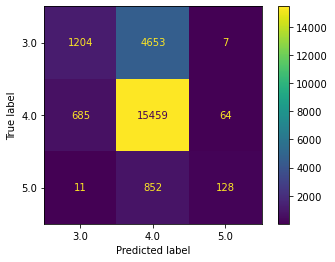

test_3.0_f1-score    0.309934
test_4.0_f1-score    0.831755
test_5.0_f1-score    0.209256
test_accuracy        0.728050
dtype: float64

In [55]:
y_pred, cvsnb_report = cross_val_report(cvsnb, X, y)
cvsnb_report